In [1]:

import pandas as pd
import numpy as np

print("📊 Starting Data Exploration...")
print("=" * 50)

df = pd.read_csv('top_100_disaster_data.csv')

print(f"✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "=" * 50)

print("🔍 TECHNICAL SUMMARY (Column types & non-null counts):")
print("-" * 50)
df.info()

print("\n" + "=" * 50)

print("📈 STATISTICAL SUMMARY (Numerical columns):")
print("-" * 50)
display(df.describe())

print("\n" + "=" * 50)

print("❓ MISSING DATA ANALYSIS:")
print("-" * 50)
missing_values = df.isnull().sum()
print(missing_values)

total_missing = missing_values.sum()
if total_missing == 0:
    print("\n✅ Excellent! No missing data found in the dataset.")
else:
    print(f"\n⚠️  Total missing values: {total_missing}")
    print("Columns with missing data:")
    print(missing_values[missing_values > 0])

print("\n" + "=" * 50)
print("🎯 Data exploration complete! Ready for analysis.")

📊 Starting Data Exploration...
✅ Dataset loaded successfully!
Dataset shape: 100 rows × 5 columns

🔍 TECHNICAL SUMMARY (Column types & non-null counts):
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   disaster.event  100 non-null    object 
 1   user.anon       100 non-null    int64  
 2   latitude        100 non-null    float64
 3   longitude.anon  100 non-null    float64
 4   time            100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB

📈 STATISTICAL SUMMARY (Numerical columns):
--------------------------------------------------


,user.anon,latitude,longitude.anon
count,100.0,100.000000,100.000000
mean,0.0,139.674985,24.554475
std,0.0,0.078679,0.074668
min,0.0,139.492436,24.398448
25%,0.0,139.590027,24.494405
50%,0.0,139.697809,24.573259
75%,0.0,139.729721,24.615740
max,0.0,139.795848,24.675147



❓ MISSING DATA ANALYSIS:
--------------------------------------------------
disaster.event    0
user.anon         0
latitude          0
longitude.anon    0
time              0
dtype: int64

✅ Excellent! No missing data found in the dataset.

🎯 Data exploration complete! Ready for analysis.


🔄 Loading disaster data...
✅ Data loaded: 100 rows × 5 columns

📊 Basic Data Analysis:
----------------------------------------
Dataset shape: (100, 5)
Columns: ['disaster.event', 'user.anon', 'latitude', 'longitude.anon', 'time']

Data types:
disaster.event     object
user.anon           int64
latitude          float64
longitude.anon    float64
time               object
dtype: object

Missing values:
disaster.event    0
user.anon         0
latitude          0
longitude.anon    0
time              0
dtype: int64

Statistical Summary:
       user.anon    latitude  longitude.anon                       datetime  \
count      100.0  100.000000      100.000000                            100   
mean         0.0  139.674985       24.554475  2013-10-18 18:44:18.009999872   
min          0.0  139.492436       24.398448            2013-10-01 08:59:45   
25%          0.0  139.590027       24.494405  2013-10-15 22:20:11.750000128   
50%          0.0  139.697809       24.573259     2013-10-20 00:34

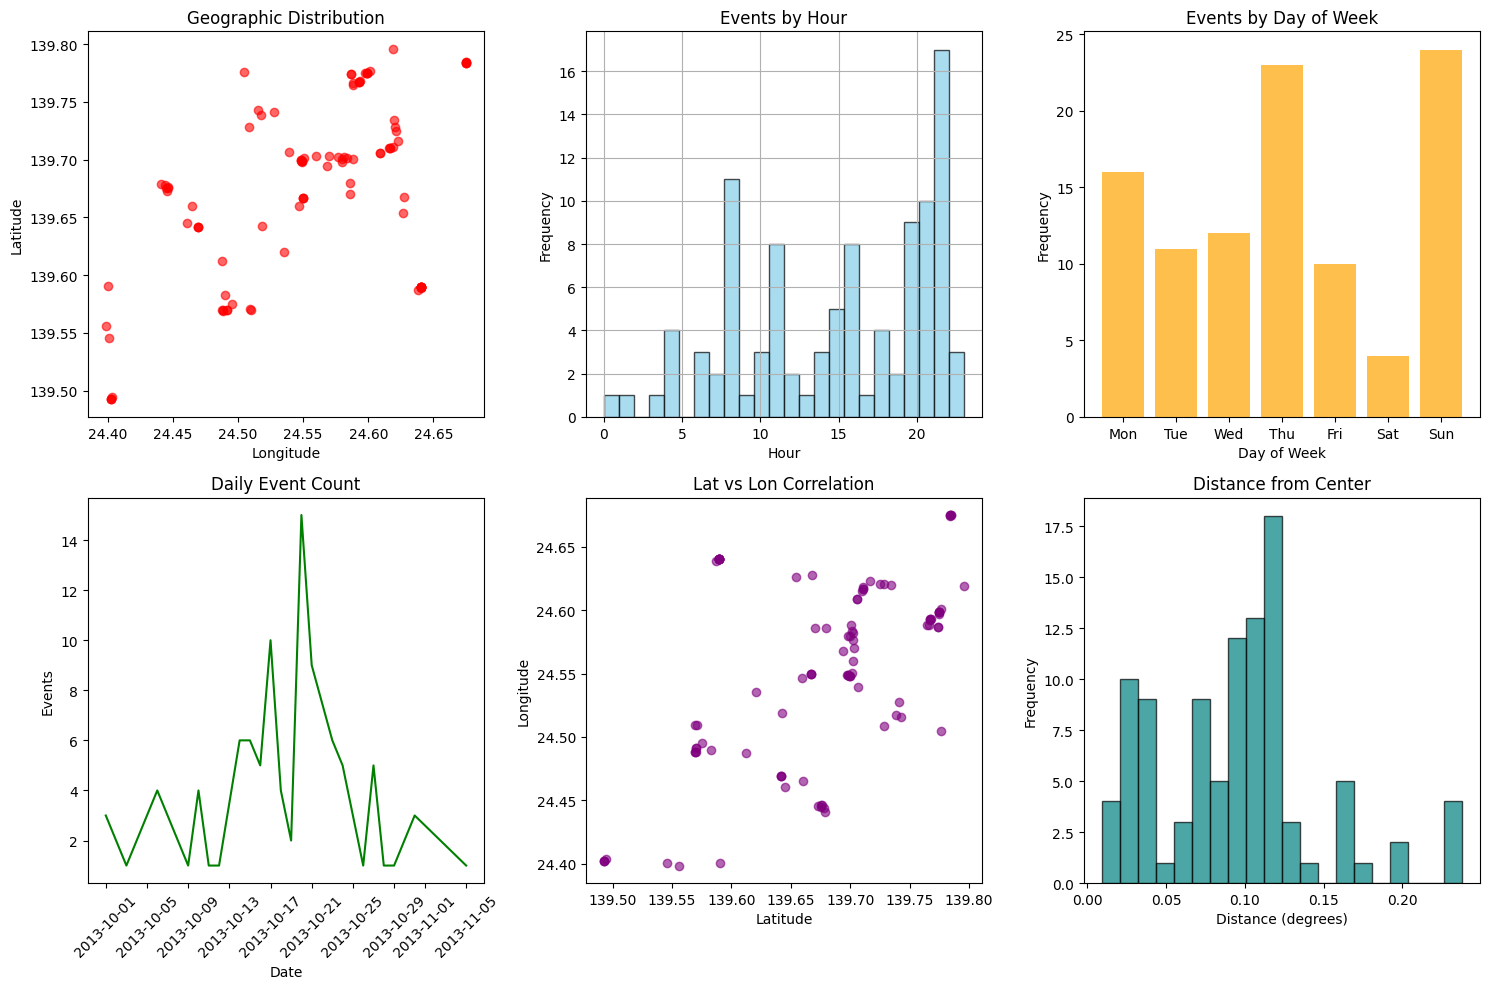


🔧 Feature Engineering Sample:
----------------------------------------
Original features: 5
Engineered features: 11
New features created: ['distance_from_center', 'is_weekend', 'time_of_day']

🔍 Key Patterns Found:
----------------------------------------
Most active hour: 22:00
Most active day: Sunday
Geographic center: (139.674985, 24.554475)
Average distance from center: 0.094697 degrees
Weekend events: 28 (28.0%)

Time of day distribution:
  evening: 45 events (45.0%)
  morning: 28 events (28.0%)
  afternoon: 20 events (20.0%)
  night: 7 events (7.0%)

✅ Quick analysis complete!


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

def quick_disaster_analysis():
    """Perform quick analysis of disaster data"""
    
    print("🔄 Loading disaster data...")
    
    # Load data
    try:
        df = pd.read_csv('top_100_disaster_data.csv')
        print(f"✅ Data loaded: {df.shape[0]} rows × {df.shape[1]} columns")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return
    
    # Basic EDA
    print("\n📊 Basic Data Analysis:")
    print("-" * 40)
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nData types:\n{df.dtypes}")
    print(f"\nMissing values:\n{df.isnull().sum()}")
    
    # Convert datetime
    df['datetime'] = pd.to_datetime(df['time'])
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.dayofweek
    
    # Statistical summary
    print(f"\nStatistical Summary:")
    print(df.describe())
    
    # Create basic visualizations
    plt.figure(figsize=(15, 10))
    
    # 1. Geographic scatter
    plt.subplot(2, 3, 1)
    plt.scatter(df['longitude.anon'], df['latitude'], alpha=0.6, c='red')
    plt.title('Geographic Distribution')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # 2. Hourly distribution
    plt.subplot(2, 3, 2)
    df['hour'].hist(bins=24, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Events by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    
    # 3. Day of week
    plt.subplot(2, 3, 3)
    dow_counts = df['day_of_week'].value_counts().sort_index()
    dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    plt.bar(range(7), dow_counts.values, color='orange', alpha=0.7)
    plt.title('Events by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Frequency')
    plt.xticks(range(7), dow_labels)
    
    # 4. Daily timeline
    plt.subplot(2, 3, 4)
    daily_counts = df.groupby(df['datetime'].dt.date).size()
    daily_counts.plot(kind='line', color='green')
    plt.title('Daily Event Count')
    plt.xlabel('Date')
    plt.ylabel('Events')
    plt.xticks(rotation=45)
    
    # 5. Coordinate correlation
    plt.subplot(2, 3, 5)
    plt.scatter(df['latitude'], df['longitude.anon'], alpha=0.6, c='purple')
    plt.title('Lat vs Lon Correlation')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    
    # 6. Distance from center
    plt.subplot(2, 3, 6)
    lat_center = df['latitude'].mean()
    lon_center = df['longitude.anon'].mean()
    distances = np.sqrt((df['latitude'] - lat_center)**2 + (df['longitude.anon'] - lon_center)**2)
    plt.hist(distances, bins=20, alpha=0.7, color='teal', edgecolor='black')
    plt.title('Distance from Center')
    plt.xlabel('Distance (degrees)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('quick_analysis_results.png', dpi=300, bbox_inches='tight')
    print(f"\n📊 Quick analysis visualization saved as 'quick_analysis_results.png'")
    plt.show()
    
    # Feature Engineering Demo
    print(f"\n🔧 Feature Engineering Sample:")
    print("-" * 40)
    
    # Create some basic features
    df['distance_from_center'] = distances
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['time_of_day'] = df['hour'].apply(lambda x: 'morning' if 6 <= x < 12 
                                       else 'afternoon' if 12 <= x < 18 
                                       else 'evening' if 18 <= x < 24 
                                       else 'night')
    
    print(f"Original features: {5}")
    print(f"Engineered features: {len(df.columns)}")
    print(f"New features created: {list(df.columns[-3:])}")
    
    # Basic patterns
    print(f"\n🔍 Key Patterns Found:")
    print("-" * 40)
    print(f"Most active hour: {df['hour'].mode()[0]}:00")
    print(f"Most active day: {['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][df['day_of_week'].mode()[0]]}")
    print(f"Geographic center: ({lat_center:.6f}, {lon_center:.6f})")
    print(f"Average distance from center: {distances.mean():.6f} degrees")
    print(f"Weekend events: {df['is_weekend'].sum()} ({df['is_weekend'].mean()*100:.1f}%)")
    
    # Time of day distribution
    print(f"\nTime of day distribution:")
    time_dist = df['time_of_day'].value_counts()
    for period, count in time_dist.items():
        print(f"  {period}: {count} events ({count/len(df)*100:.1f}%)")
    
    print(f"\n✅ Quick analysis complete!")
    return df

if __name__ == "__main__":
    result_df = quick_disaster_analysis()